In [1]:
import requests
import json
import pandas as pd
from PIL import Image

In [2]:
url = "http://dataservice.accuweather.com/forecasts/v1/daily/5day/2153253?apikey=FsKSJ8qA7YyZUFaO3LGG0iYNzipfAMAm"

#headers = {"token": "FsKSJ8qA7YyZUFaO3LGG0iYNzipfAMAm"}

r = requests.get(url)
r.status_code

200

In [3]:
r_json = r.json()
print(json.dumps(r_json, indent=4, sort_keys=True))

{
    "DailyForecasts": [
        {
            "Date": "2023-02-22T07:00:00-05:00",
            "Day": {
                "HasPrecipitation": false,
                "Icon": 2,
                "IconPhrase": "Mostly sunny"
            },
            "EpochDate": 1677067200,
            "Link": "http://www.accuweather.com/en/us/rincon-ga/31326/daily-weather-forecast/2153253?day=1&lang=en-us",
            "MobileLink": "http://www.accuweather.com/en/us/rincon-ga/31326/daily-weather-forecast/2153253?day=1&lang=en-us",
            "Night": {
                "HasPrecipitation": false,
                "Icon": 35,
                "IconPhrase": "Partly cloudy"
            },
            "Sources": [
                "AccuWeather"
            ],
            "Temperature": {
                "Maximum": {
                    "Unit": "F",
                    "UnitType": 18,
                    "Value": 82.0
                },
                "Minimum": {
                    "Unit": "F",
              

In [4]:
# max temp from json dictionary
max_temp = r_json["DailyForecasts"][0]["Temperature"]["Maximum"]["Value"]
max_temp

82.0

In [5]:
# precipitation boolean from json
daily_precip = r_json["DailyForecasts"][0]["Day"]["HasPrecipitation"]
daily_precip

False

In [6]:
# date/time from json
date = r_json["DailyForecasts"][0]["Date"]
date


'2023-02-22T07:00:00-05:00'

In [7]:
# create a list of the index for all 5 days within dictionary
day_index = [0,1,2,3,4]
# create empty lists for use in df
temp = []
precip = []
day_date = []

# loop through response dictionary and append values to empty lists 
for days in day_index:
    temp.append(r_json["DailyForecasts"][days]["Temperature"]["Maximum"]["Value"])
    precip.append(r_json["DailyForecasts"][days]["Day"]["HasPrecipitation"])
    day_date.append(r_json["DailyForecasts"][days]["Date"])

In [8]:
# create df with newly appened lists
five_day_df = pd.DataFrame({"Date":day_date,
                           "Temperature":temp,
                           "Precipitation":precip})
five_day_df

,Date,Temperature,Precipitation
0,2023-02-22T07:00:00-05:00,82.0,False
1,2023-02-23T07:00:00-05:00,86.0,False
2,2023-02-24T07:00:00-05:00,85.0,False
3,2023-02-25T07:00:00-05:00,78.0,False
4,2023-02-26T07:00:00-05:00,81.0,False


Board shorts and t-shirt


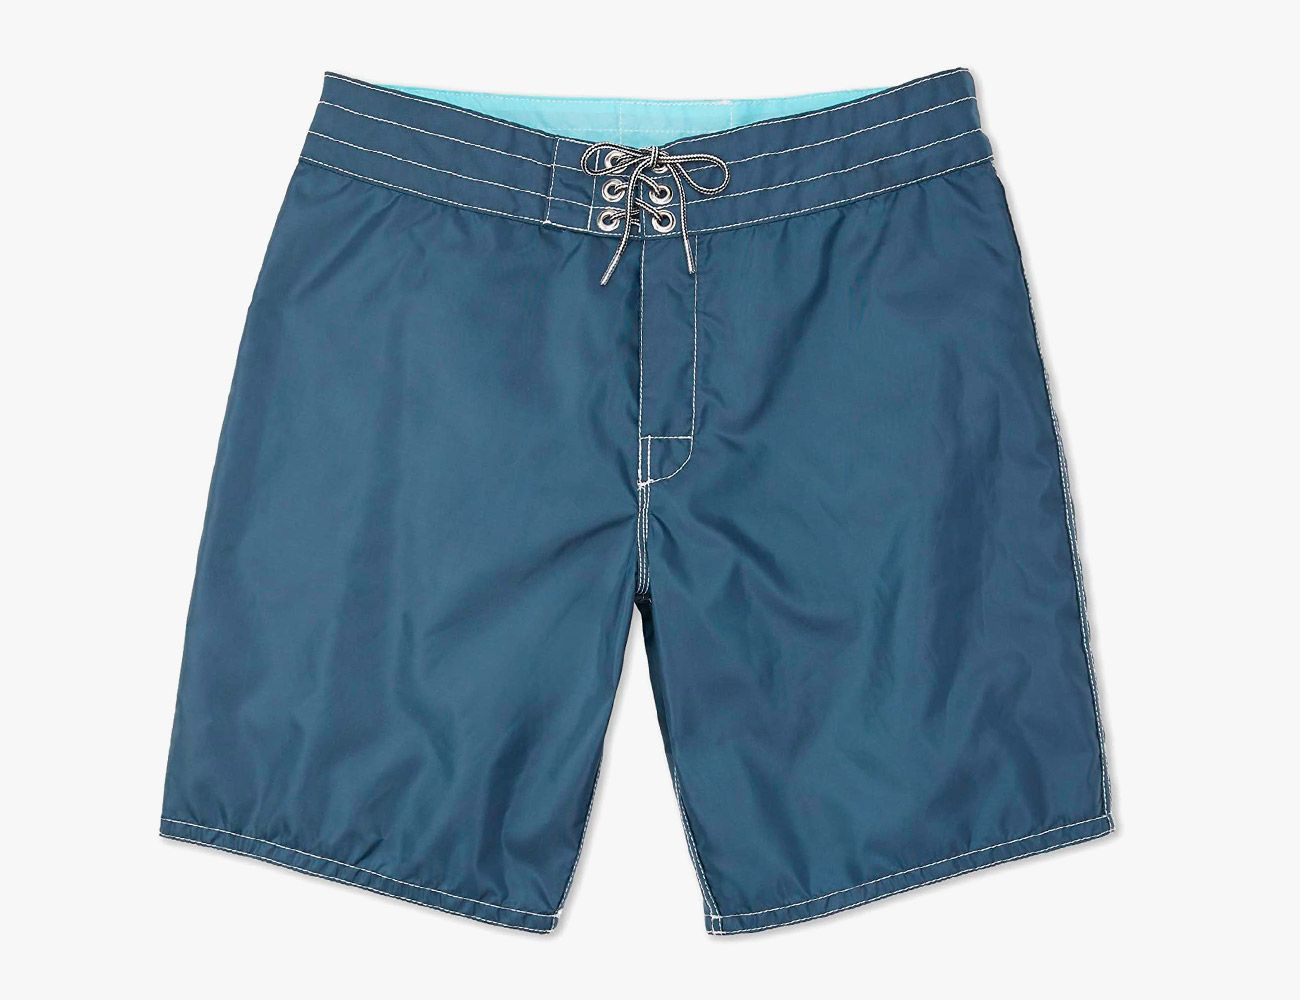

In [9]:
# create variables for day temps using iloc
today_temp = five_day_df.iloc[0,1]
tomorrow_temp = five_day_df.iloc[1,1]
next_day_temp = five_day_df.iloc[2,1]

# create variables for precip using iloc
today_precip = five_day_df.iloc[0,2]
tomorrow_precip = five_day_df.iloc[1,2]
next_day_precip = five_day_df.iloc[2,2]

# think i need to define functions of conditionals to output proper clothing
# def clothing():
# image.open() for Bren's illustrations

img_shorts = Image.open('boardshorts.jpg')


def clothing_1(temp_1,precip_1):
    if temp_1 > 72.5 and precip_1 == False:
        print("Board shorts and t-shirt")
        display(img_shorts)
    else:
        print("Stay Home")
        
clothing_1(today_temp,today_precip)